In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Reading a CSV

In [58]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

In [59]:
df = pd.read_csv('../dados/btc-market-price.csv')

In [60]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [61]:
df = pd.read_csv('../dados/btc-market-price.csv', header=None)

In [62]:
df

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [63]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [64]:
df.columns = ['Timestap', 'Price']

In [65]:
df.shape

(365, 2)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Timestap  365 non-null    object 
 1   Price     365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [67]:
df.head()

,Timestap,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [68]:
df.tail()

,Timestap,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [69]:
df.dtypes

Timestap     object
Price       float64
dtype: object

In [70]:
pd.to_datetime(df['Timestap']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestap, dtype: datetime64[ns]

In [71]:
df['Timestap'] = pd.to_datetime(df['Timestap'])

In [72]:
df.head()

,Timestap,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [73]:
df.dtypes

Timestap    datetime64[ns]
Price              float64
dtype: object

In [74]:
df.set_index('Timestap', inplace=True)

In [75]:
df

,Price
Timestap,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [76]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## Puting everything toghether

In [77]:
df = pd.read_csv('../dados/btc-market-price.csv')
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [78]:
df.head()

,Price
Timestamp,
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
2017-04-07,1190.454250


In [79]:
df = pd.read_csv('../dados/btc-market-price.csv', 
                 header=None,
                 names=['Timestamp', 'Price'],
                 index_col=0,
                 parse_dates=True)

In [80]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


### Ploting values

<Axes: xlabel='Timestamp'>

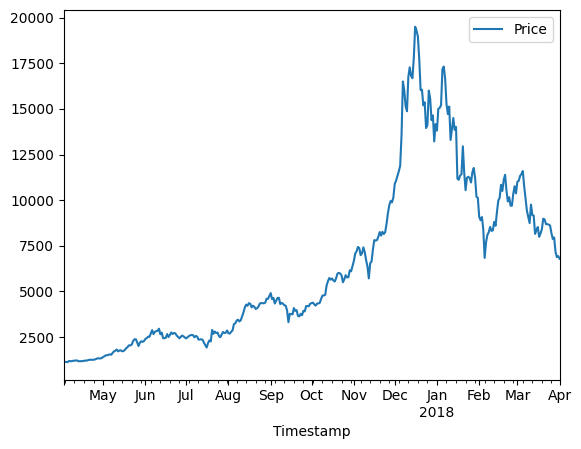

In [81]:
df.plot()

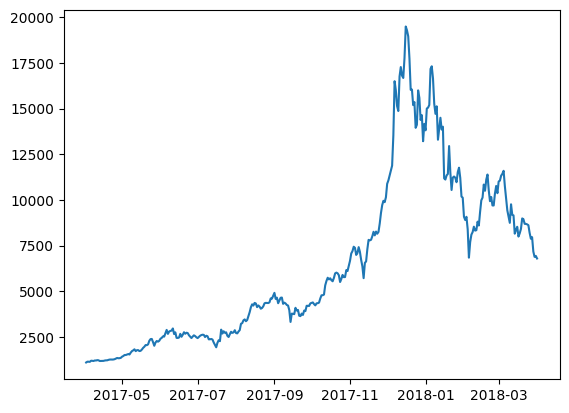

In [82]:
plt.plot(df.index, df['Price'])

In [83]:
x = np.arange(-10,11)

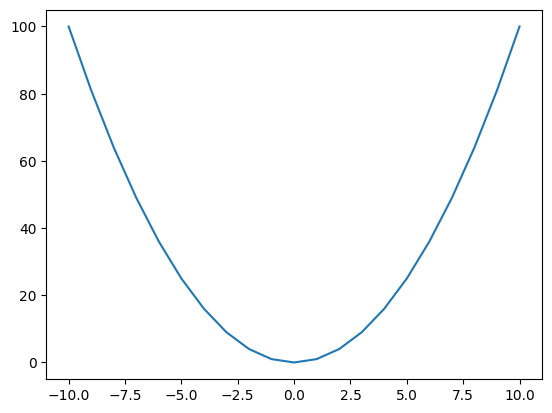

In [84]:
plt.plot(x, x**2)

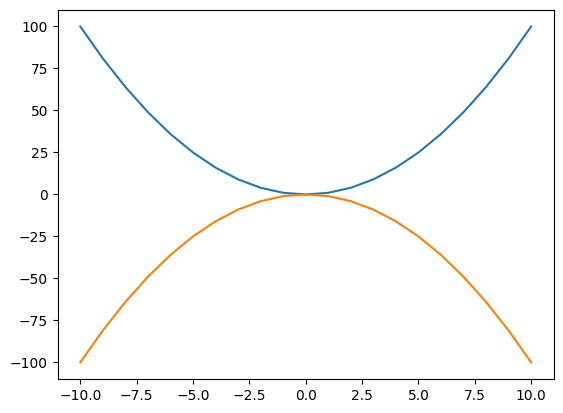

In [85]:
plt.plot(x, x**2)
plt.plot(x,-1*(x**2))

Text(0.5, 1.0, 'My nice plot')

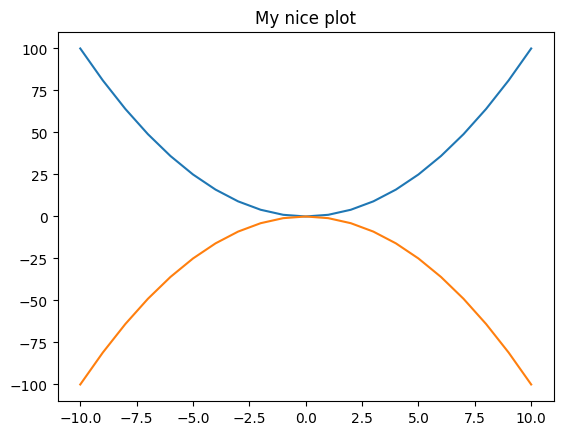

In [86]:
plt.plot(figsize=(12,6))
plt.plot(x, x**2)
plt.plot(x,-1*(x**2))

plt.title('My nice plot')

<Axes: title={'center': 'Bitcoin Price'}, xlabel='Timestamp'>

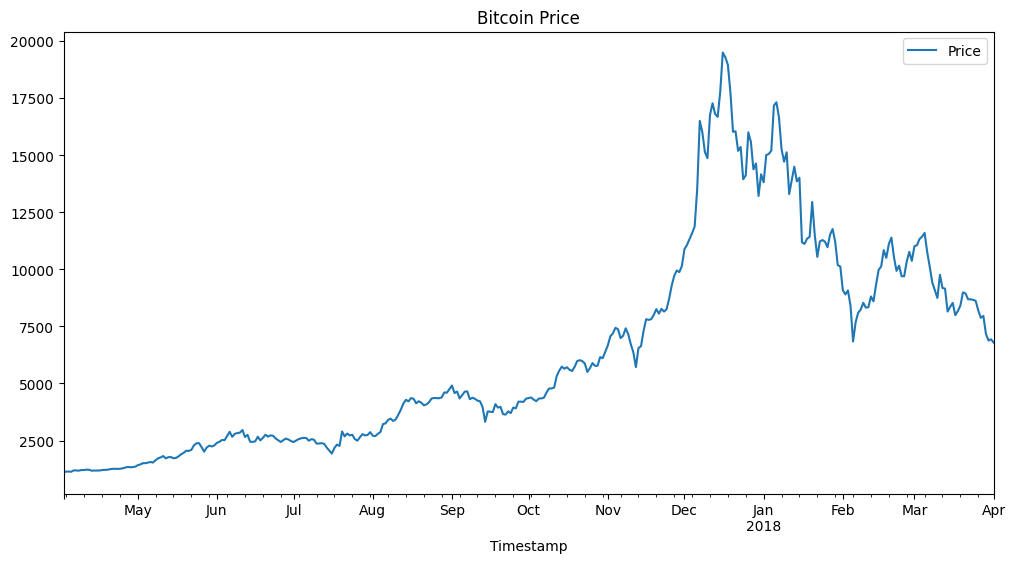

In [87]:
df.plot(figsize=(12,6), title='Bitcoin Price')

## One more challenge

In [88]:
eth = pd.read_csv('../dados/eth-price.csv')

In [89]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [90]:
eth = pd.read_csv('../dados/eth-price.csv', parse_dates=True)
print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [91]:
pd.to_datetime(eth['UnixTimeStamp'])

0     1970-01-01 00:00:01.491091200
1     1970-01-01 00:00:01.491177600
2     1970-01-01 00:00:01.491264000
3     1970-01-01 00:00:01.491350400
4     1970-01-01 00:00:01.491436800
                   ...             
357   1970-01-01 00:00:01.522195200
358   1970-01-01 00:00:01.522281600
359   1970-01-01 00:00:01.522368000
360   1970-01-01 00:00:01.522454400
361   1970-01-01 00:00:01.522540800
Name: UnixTimeStamp, Length: 362, dtype: datetime64[ns]

In [92]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [93]:
pd.to_datetime(eth['Date(UTC)'])

0     2017-04-02
1     2017-04-03
2     2017-04-04
3     2017-04-05
4     2017-04-06
         ...    
357   2018-03-28
358   2018-03-29
359   2018-03-30
360   2018-03-31
361   2018-04-01
Name: Date(UTC), Length: 362, dtype: datetime64[ns]

In [94]:
eth = pd.read_csv('../dados/eth-price.csv', parse_dates=[0])

In [95]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


In [96]:
eth.dtypes

Date(UTC)        datetime64[ns]
UnixTimeStamp             int64
Value                   float64
dtype: object

In [97]:
eth = pd.read_csv('../dados/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


In [98]:
prices = pd.DataFrame(index=df.index)

In [99]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [100]:
prices['Bitcoin'] = df['Price']

In [101]:
prices['Etherium'] = eth['Value']

In [102]:
prices.head()

,Bitcoin,Etherium
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

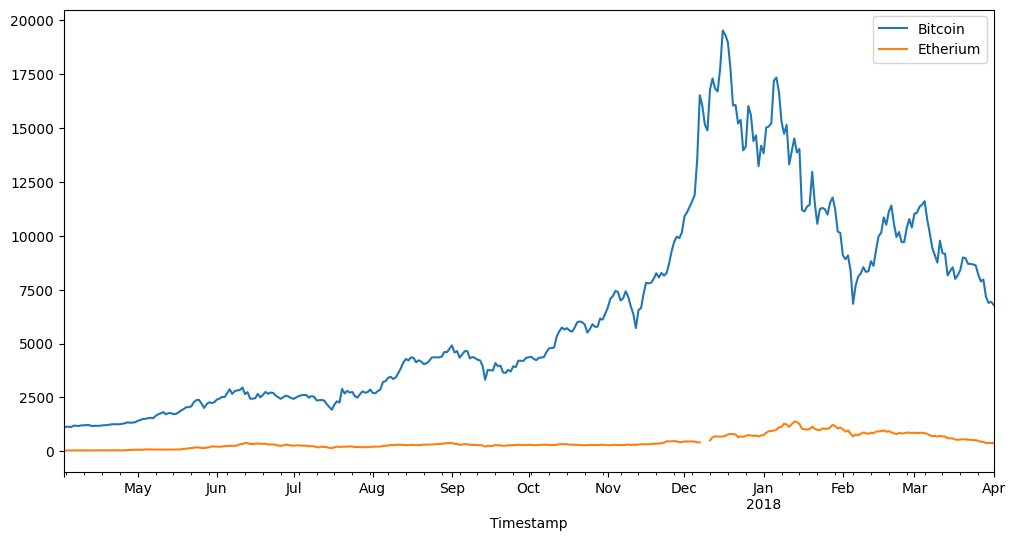

In [103]:
prices.plot(figsize=(12, 6))

<Axes: xlabel='Timestamp'>

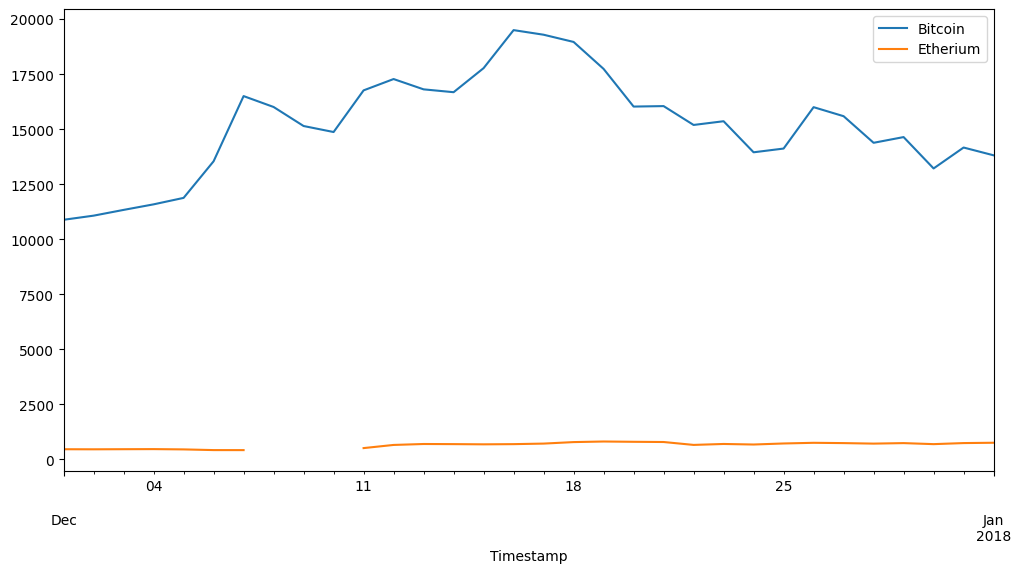

In [104]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))